<a href="https://colab.research.google.com/github/Dcodinginsane/Data-Analysis-project/blob/main/SMA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=30"
response = requests.get(url)
data = response.json()
data
"""
{'prices': [[1689541233624, 30281.386722199204],
  [1689544814377, 30304.575216650694],
  [1689548480051, 30340.36733508724],
  [1689552032724, 30237.334785146097],
...
"""

"\n{'prices': [[1689541233624, 30281.386722199204],\n  [1689544814377, 30304.575216650694],\n  [1689548480051, 30340.36733508724],\n  [1689552032724, 30237.334785146097],\n...\n"

In [6]:
prices = [x[1] for x in data['prices']]
timestamps = [x[0] for x in data['prices']]
df = pd.DataFrame({'Price': prices}, index=pd.to_datetime(timestamps, unit='ms'))
df
"""
                        Price
2023-07-16 21:00:33.624 30281.386722
2023-07-16 22:00:14.377 30304.575217
2023-07-16 23:01:20.051 30340.367335
2023-07-17 00:00:32.724 30237.334785
2023-07-17 01:01:15.180 30225.182677
... ...
2023-08-15 17:00:31.224 29248.678234
2023-08-15 18:01:06.858 29288.518660
2023-08-15 19:00:08.043 29308.965002
2023-08-15 20:00:06.070 29144.072559
2023-08-15 20:30:28.000 29195.129324
"""

'\n                        Price\n2023-07-16 21:00:33.624 30281.386722\n2023-07-16 22:00:14.377 30304.575217\n2023-07-16 23:01:20.051 30340.367335\n2023-07-17 00:00:32.724 30237.334785\n2023-07-17 01:01:15.180 30225.182677\n... ...\n2023-08-15 17:00:31.224 29248.678234\n2023-08-15 18:01:06.858 29288.518660\n2023-08-15 19:00:08.043 29308.965002\n2023-08-15 20:00:06.070 29144.072559\n2023-08-15 20:30:28.000 29195.129324\n'

In [7]:
df['SMA'] = df['Price'].rolling(window=5).mean()

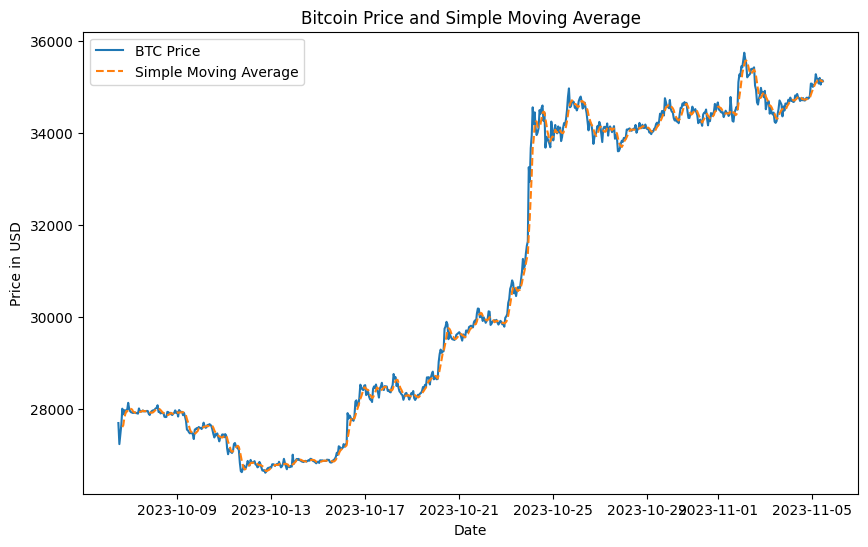

In [8]:
plt.figure(figsize=(10,6))
plt.plot(df['Price'], label='BTC Price')
plt.plot(df['SMA'], label='Simple Moving Average', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Bitcoin Price and Simple Moving Average')
plt.show()

In [9]:
df['EMA'] = df['Price'].ewm(alpha=0.001, adjust=False).mean()

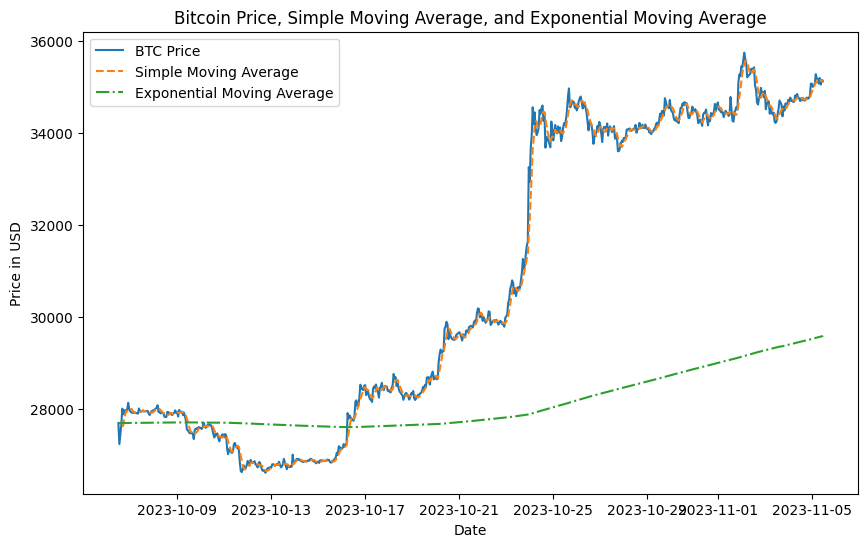

In [10]:
plt.figure(figsize=(10,6))
plt.plot(df['Price'], label='BTC Price')
plt.plot(df['SMA'], label='Simple Moving Average', linestyle='--')
plt.plot(df['EMA'], label='Exponential Moving Average', linestyle='-.')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Bitcoin Price, Simple Moving Average, and Exponential Moving Average')
plt.show()


In [11]:
exog_data = df['advertising_spend']
model = ARIMA(endog=sales_data, exog=exog_data, order=(1, 0, 1))
fit_model = model.fit()

KeyError: ignored

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
np.random.seed(42)

# AR part: 1 - 0.5 * z - 0.25 * z^2
# MA part: 1 + 0.5 * z + 0.25 * z^2
ar = np.array([1, -0.5, -0.25])
ma = np.array([1, 0.5, 0.25])

arma_process = ArmaProcess(ar, ma)
simulated_data = arma_process.generate_sample(nsample=1000)
simulated_series = pd.Series(simulated_data)

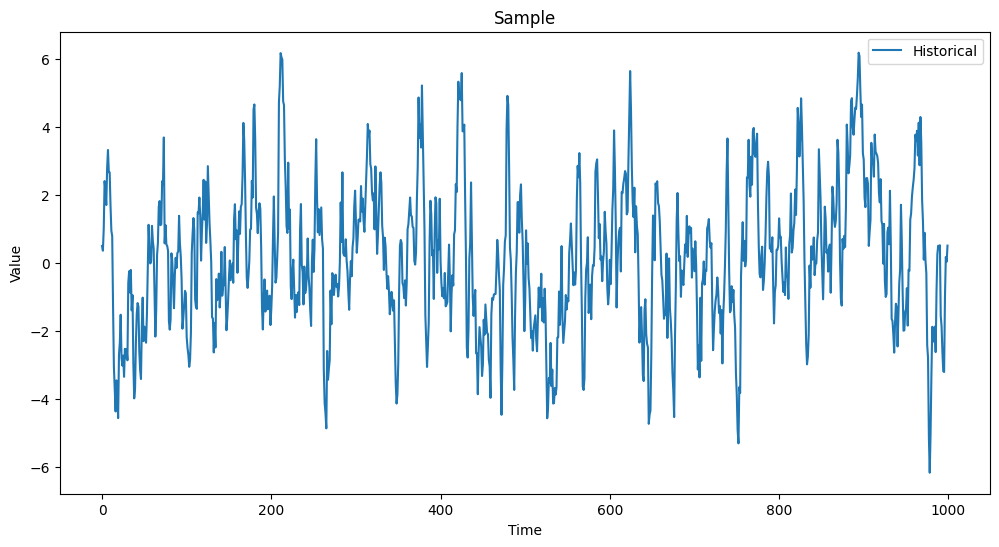

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(simulated_series.index, simulated_series.values, label='Historical')
plt.title("Sample")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

In [14]:
arima_model = ARIMA(simulated_series, order=(2, 0, 2))
fit_arima_model = arima_model.fit()

# Forecast the next 10 observations
arima_forecast = fit_arima_model.get_forecast(steps=10)
arima_forecast_index = pd.RangeIndex(start=len(simulated_series), stop=len(simulated_series) + 10)
arima_forecast_series = pd.Series(arima_forecast.predicted_mean.values, index=arima_forecast_index)
print(arima_forecast_series)
"""
1000    0.381838
1001    0.447337
1002    0.372533
1003    0.324770
1004    0.285872
1005    0.255143
1006    0.230782
1007    0.211478
1008    0.196181
1009    0.184058
dtype: float64
"""

1000    0.381838
1001    0.447337
1002    0.372533
1003    0.324770
1004    0.285872
1005    0.255143
1006    0.230782
1007    0.211478
1008    0.196181
1009    0.184058
dtype: float64


'\n1000    0.381838\n1001    0.447337\n1002    0.372533\n1003    0.324770\n1004    0.285872\n1005    0.255143\n1006    0.230782\n1007    0.211478\n1008    0.196181\n1009    0.184058\ndtype: float64\n'